Traffic Accidents in Munich

Important columns: Category, Accident-type, year, month, value
Goal is to predict values for: Akoholunfälle, insgesamt, 2021, 01

The model is trained with the data until 2020. The updated data from 2021 will be used to compute the error between my prediction values and the actual numbers.



In [3]:
# import libraries for charting and manipulations with datasets
import numpy as np
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [5]:
#read dataset and name columns
df = pd.read_csv("https://raw.githubusercontent.com/ValentinLu/DPSChallenge/main/monatszahlen2209_verkehrsunfaelle.csv", header=None)
# drop unimportent columns
df.drop(df.columns[[5,6,7,8]], axis=1, inplace=True)
# drop header row
df = df.drop(df[df.index == 0].index)
# set names for columns
df = df.set_axis(['category', 'type', 'year', 'month', 'value'], axis=1, inplace=False)
df.memory_usage(deep=True)

Index          132
category    198468
type        180886
year        127246
month       131264
value       122415
dtype: int64

In [21]:
# copy dataframe for later usage
data = df
# drop rows with values year = 2021 and year = 2022 and month = Summe
data = data.drop(data.query("year >= '2021'").index)
data = data.drop(data.query("month == 'Summe'").index)
# convert number columns
data[['year', 'month', 'value']] = data[['year', 'month', 'value']].astype(np.int64)
data["month"] = pd.to_datetime(data["month"], format="%Y%m")

Visualisation for Accidents Total and Accidents with personal injurys

In [7]:
# plot type of accidents per year and category = Alkoholunfälle, Fluchtunfälle, Verkehrsunfälle
# drop other rows with Personenschäden, Verletzte und Getötete for a cleaned view on the total numbers
acc_total = data.drop(data.query("type != 'insgesamt'").index)

          category   value
0   Alkoholunfälle   11026
1    Fluchtunfälle  221616
2  Verkehrsunfälle  891374


In [8]:
# drop other rows except Personenschäden, Verletzte und Getötete for a cleaned view on the accidents with personal injury
acc_personalinjury = data.drop(data.query("type == 'insgesamt'").index)

          category   value
0   Alkoholunfälle    5216
1    Fluchtunfälle   11312
2  Verkehrsunfälle  235892


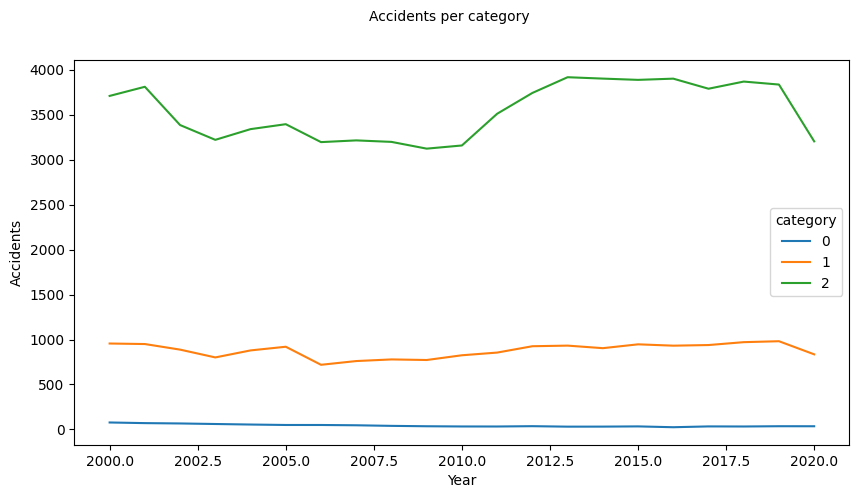

In [60]:
fig, ax = plt.subplots(figsize=(10,5))
acc_total.groupby(['year','category']).mean()['value'].unstack().plot(ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Accidents')
fig.suptitle('Accidents per category', fontsize=10)
fig.savefig('yearly_total_per_category.png')
plt.show()

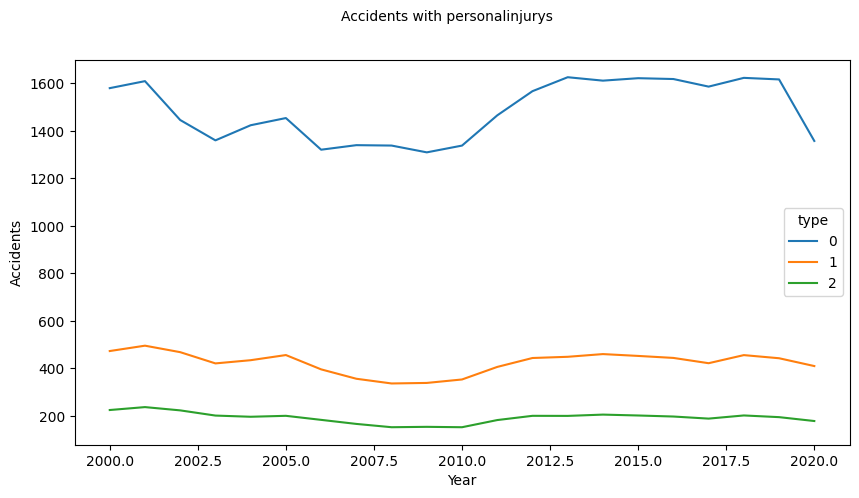

In [61]:
fig, ax = plt.subplots(figsize=(10,5))
data.groupby(['year','type']).mean()['value'].unstack().plot(ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Accidents')
fig.suptitle('Accidents with personalinjurys ', fontsize=10)
fig.savefig('yearly_personalinjury.png')
plt.show()

Visualisation for Accidents to link personalinjurys due to alcohol or hit-and-run

In [62]:
acc_total = data.drop(data.query("type != 0").index)
n_by_category_total = acc_total.groupby("category")["value"].sum().reset_index()
print(n_by_category_total)
acc_personalinjury = data.drop(data.query("type == 0").index)
n_by_personal_total = acc_personalinjury.groupby("category")["value"].sum().reset_index()
print(n_by_personal_total)

   category   value
0         0   11026
1         1  221616
2         2  891374
   category   value
0         0    5216
1         1   11312
2         2  235892


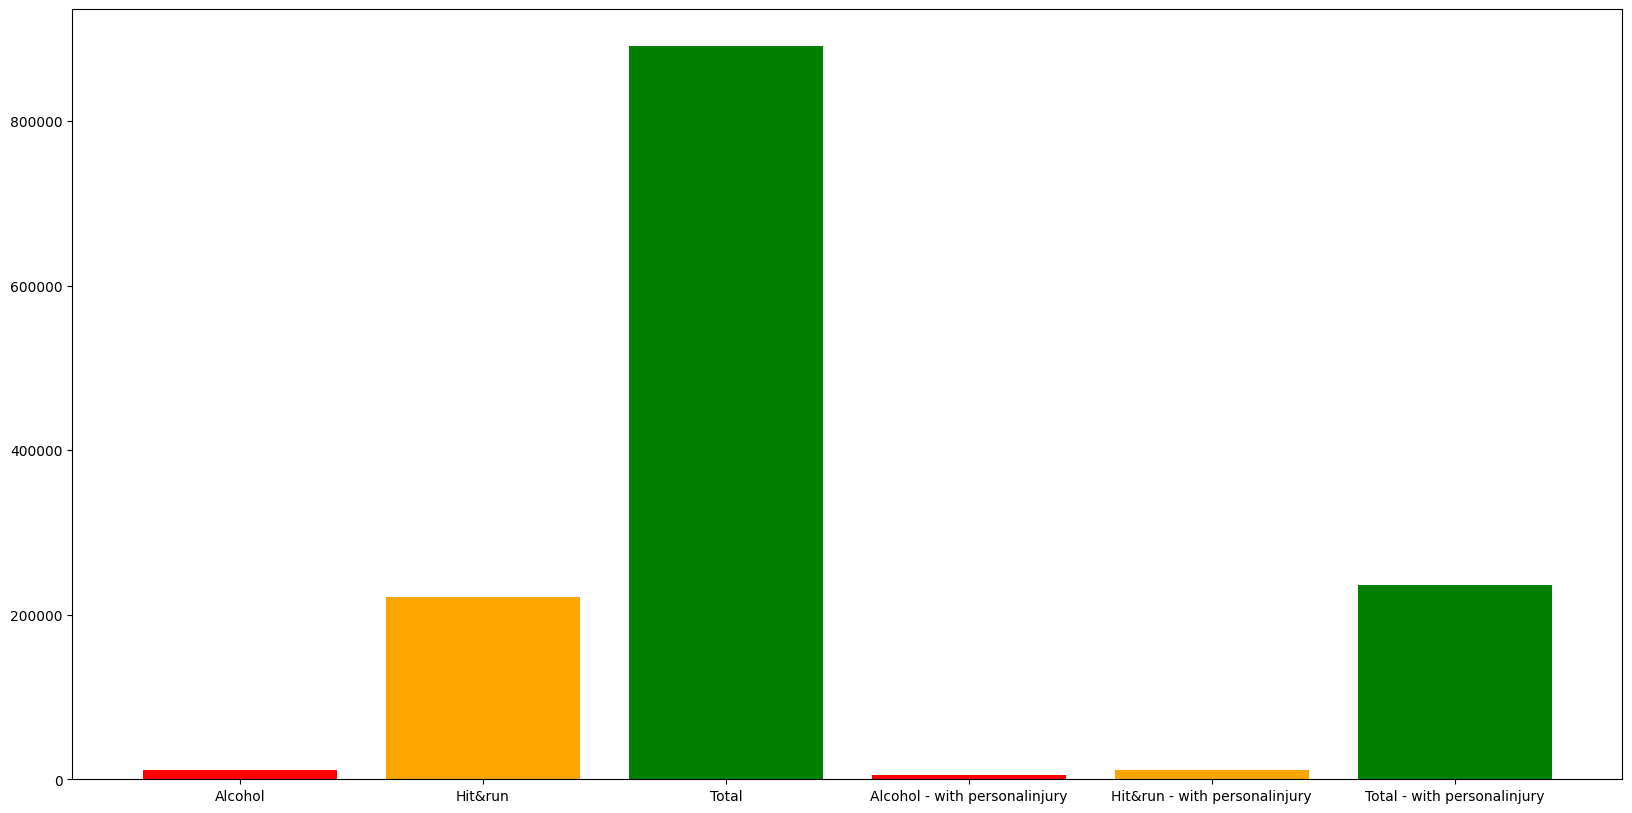

In [63]:
values = [11026, 221616, 891374, 5216, 11312, 235892 ]
axis = ['Alcohol','Hit&run','Total', 'Alcohol - with personalinjury','Hit&run - with personalinjury','Total - with personalinjury', ]
fig = plt.figure(figsize = (20, 10))
plt.bar(axis, values, color=['red', 'orange', 'green'])
fig.savefig('yearly_difference.png')